In [1]:
%%javascript
    MathJax.Hub.Config({
      TeX: { equationNumbers: { autoNumber: "AMS" } }
    });

<IPython.core.display.Javascript object>

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 $('div.prompt').hide();
 } else {
 $('div.input').show();
$('div.prompt').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Code Toggle"></form>''')

In [3]:
from IPython.display import HTML

HTML('''
<a href="https://github.com/usnistgov/pfhub/raw/master/benchmarks/benchmark8.ipynb"
   download>
<button type="submit">Download Notebook</button>
</a>
''')

# Benchmark Problem 8: Homogeneous Nucleation

In [4]:
from IPython.display import HTML

HTML('''{% include jupyter_benchmark_table.html num="[8]" revision=1 %}''')

See the journal publication entitled ["Phase Field Benchmark Problems for Nucleation"][paper] for more details about the nucleation benchmark problem. An in-depth analysis focused on this benchmark was also published in the journal publication entitled ["On the Effect of Nucleation Undercooling on Phase Transformation Kinetics"][followup]. The analysis in this later publication led to several minor changes to the benchmark that are not present in the first journal publication. Furthermore, read [the extended essay][benchmarks] for a discussion about the need for benchmark problems.

[benchmarks]: ../
[paper]: https://doi.org/10.1016/j.commatsci.2021.110371
[followup]: https://doi.org/10.1007/s40192-022-00284-1

# Table of Contents

* [Overview](#Overview)
* [Model Formulation](#Model-Formulation)
	* [The phase field model in classical nucleation theory](#The-phase-field-model-in-classical-nucleation-theory)
	* [The properties of the classical nucleus](#The-properties-of-the-classical-nucleus)
	* [Avrami plots](#Avrami-plots)
* [Benchmark 8 Specification](#Benchmark-8-Specification)
	* [Part (a): single seed](#Part-%28a%29:-single-seed)
    * [Part (b): multiple initial seeds](#Part-%28b%29:-multiple-initial-seeds)
    * [Part (c): multiple seeds at random times](#Part-%28c%29:-multiple-seeds-at-random-times)
* [Submission Guidelines](#Submission-Guidelines)
	* [Part (a)](#Part-%28a%29)
	* [Part (b)](#Part-%28b%29)
	* [Part (c)](#Part-%28c%29)
* [Results](#Results)
* [References](#References)


## Overview

Phase field modeling of nucleation has a long history and is covered
in a number of reviews (<a id="ref-1" href="#cite-granasy2002nucleation">Gránásy 2002</a>,
<a id="ref-2" href="#cite-castro2003phase">Castro 2003</a>,
<a id="ref-3" href="#cite-simmons2004microstructural">Simmons 2004</a>,
<a id="ref-4" href="#cite-granasy2007phase">Gránásy 2007</a>,
<a id="ref-5" href="#cite-warren2009phase">Warren 2009</a>,
<a id="ref-6" href="#cite-heo2014phase">Heo 2014</a>,
<a id="ref-7" href="#cite-granasy2019">Gránásy 2019</a>). The problem formulation of crystallization of an ideal pure liquid cooled
below its melting point starts with homogeneous nucleation, a process
in which the internal fluctuations of the undercooled liquid lead to
the formation of crystal-like seeds able to grow to macroscopic
sizes. The nucleation can be assisted by the presence of surfaces
(container walls, foreign particles, etc.), in which case the process
is termed heterogeneous nucleation. We note that homogeneous
nucleation is an idealized formulation, and it is unlikely homogeneous
nucleation occurs, due to impurities present in experimental
apparatus. However, creating benchmark problems for homogeneous
nucleation is still needed since the focus in nucleation research
often lies on the underlying homogeneous nucleation, as it is the
basis for advancing theoretical approaches to the much more complex
phenomena governing heterogeneous nucleation. This benchmark
(benchmark 8) targets homogeneous nucleation while benchmark 9
targets heterogeneous nucleation.

There are two main modeling approaches to introduce nuclei into a
metastable system: the Langevin noise method
(<a id="ref-8" href="#cite-kubo1966">Kubo 1966</a>,
<a id="ref-9" href="#cite-granasy2002nucleation">Gránásy 2002</a>)
and the explicit nucleation
method
(<a id="ref-10" href="#cite-simmons2000phase">Simmons 2000</a>,
<a id="ref-11" href="#cite-shi2019">Shi 2019</a>)
. We focus on the explicit
method, where the critical nucleus size and the nucleation energy are
determined by the classical nucleation theory. We break down our
consideration of homogeneous nucleation into three parts. Part (a)
considers the simple case of single-seed homogeneous nucleation. We
explore how the particle size influences the evolution of the nucleus
when the thermodynamic driving force is close to the critical value
where we can observe whether the particle grows, dissolves or remains
stationary. In parts (b) and (c) we consider multiple-seed homogeneous
nucleation, with nuclei appearing at fixed time $t=0$ or at random
times distributed uniformly, respectively, with the latter part
illustrating a scenario with constant nucleation rate. The Benchmark
Problem probes the differences between transformation kinetics of the
two cases and summarizes them using the Avrami plots based on the
Johnson-Mehl-Avrami-Kolmogorov (JMAK)
theory
(<a id="ref-12" href="#cite-johnson1939reaction">Johnson 1939</a>,
<a id="ref-13" href="#cite-avrami1939kinetics">Avrami 1939</a>,
<a id="ref-14" href="#cite-avrami1940kinetics">Avrami 1940</a>,
<a id="ref-15" href="#cite-avrami1941granulation">Avrami 1941</a>,
<a id="ref-16" href="#cite-kolmogorov1937izv">Kolmogorov 1937</a>).

## Model Formulation

### The phase field model in classical nucleation theory

For this benchmark problems we use the simplest possible phase field model with a single non-conserved phase field $\phi$, which describes an isothermal pure substance with one liquid ($\phi=0$) and one solid ($\phi=1$) phase. The free energy of this system is  
\begin{equation}
    \mathcal{F}(\phi)=\int \left[\frac{\epsilon^2}{2}(\nabla \phi)^2+wg(\phi)-\Delta f p(\phi) \right] d{V},
    \label{eqn:Fphi}
\end{equation}
set $g(\phi)=\phi^2(1-\phi)^2$, a simple double well function with minima at $\phi=0$ and $\phi=1$, $ w$ controls the double-well barrier height, $\epsilon^2$ is the gradient energy coefficient, let $p(\phi)=\phi^3(10-15\phi+6\phi^2)$, which ensures that $p(0)=p'(0)=p'(1)=0$ and $p(1)=1$, and $\Delta f$ is the driving force for solidification at the simulation temperature ($\Delta f$ is positive below the melting point). The time evolution of $\phi$ is given by the Allen-Cahn equation (<a id="ref-17" href="#cite-allen1979microscopic">Allen 1979</a>)
\begin{equation}
    \frac{\partial \phi}{\partial t}=-M\frac{\delta \mathcal{F}}{\delta \phi}=M\left[\epsilon^2\nabla^2\phi-wg'(\phi)+\Delta fp'(\phi)\right]
    \label{eqn:dphidt}
\end{equation}
where $M$ is the mobility parameter. We will restrict the problem to two dimensions (2D). For a planar interface, one can show that the equilibrium ($\Delta f$=0) solid-liquid interface profile with the interface centered at $x=x_0$ is given by
\begin{equation}
    \phi(x)=\frac{1}{2}\left[1-\tanh\left(\frac{x-x_0}{\sqrt{2}\ell}\right)\right],
    \label{eqn:phir}
\end{equation}
where $x$ is the perpendicular distance from the interface.
We use this expression as the initial condition when we introduce a nucleus. We can also obtain the width $\ell$ and the free energy of the interface, $\gamma$, as
\begin{equation}
    \ell=\sqrt{\frac{\epsilon^2}{w}}
    \label{eqn:l}
\end{equation}
and
\begin{equation}
    \gamma=\frac{\sqrt{\epsilon^2w}}{3\sqrt{2}}.
    \label{eqn:gamma}
\end{equation}

Choosing a characteristic length scale $\xi=\ell$ and a characteristic time scale $\tau=1/(Mw)$, we can obtain a nondimensional form of the problem (the nondimensional quantities are denoted by tildes),
\begin{equation}
    \tilde{\mathcal{F}}(\phi)=\int \left[\frac{1}{2}(\tilde{\nabla} \phi)^2+g(\phi)- \tilde{\Delta f} p(\phi) \right] d{\tilde{V}}
    \label{eqn:tFphi}
\end{equation}
and
\begin{equation}
    \frac{\partial \phi}{\partial \tilde{t}}=\tilde{\nabla}^2\phi-g'(\phi)+\tilde{\Delta f}p'(\phi),
    \label{eqn:dphidtt}
\end{equation}
with $\tilde{\Delta f}=\Delta f/w$.

### The properties of the classical nucleus

The explicit nucleation method that we employ introduces nuclei into a metastable system, with their radii and nucleation barrier determined from classical nucleation theory. Classical nucleation theory views crystallite fluctuations appearing in the undercooled liquid as small spherical domains of the bulk crystalline phase bounded by a mathematically sharp solid-liquid interface. For a 2D system, the free energy of a circular solid particle of radius $r$ is 
\begin{equation}
    \Delta G(r) = 2 \pi r \gamma - \pi r^2 \Delta f
    \label{eqn:deltaG}
\end{equation}
where $\Delta f$ is the nucleation driving force that is used in our phase field model, and $\gamma$ is the free energy of the interface. The free energy of the particle is a balance between the energy cost in forming the solid-liquid interface, and the free energy from the driving force which is released when the crystalline particle forms. Once the rate of change of free energy with respect to particle size becomes negative, the particle can grow. Taking the derivative of $\Delta G(r)$ we get the rate of change of free energy with respect to radius as
\begin{equation}
    \frac{d\Delta G}{dr}=2\pi \gamma - 2\pi r\Delta f.
    \label{eqn:ddeltaGdr}
\end{equation}
By setting $d\Delta G/dr$ to zero, we obtain the critical radius $r^*$ as
\begin{equation}
    r^* = \frac{\gamma}{\Delta f}.
    \label{eqn:rc}
\end{equation}
The corresponding critical nucleation free energy is
\begin{equation}
    \Delta G^* = \frac{\pi \gamma^2}{\Delta f}.
    \label{eqn:deltaGc}
\end{equation}
Using the same units as before, the nondimensional forms of these quantities are
\begin{equation}
    \tilde{r^*} = \frac{1}{3\sqrt{2}}\frac{1}{\tilde{\Delta f}}
    \label{eqn:trc}
\end{equation}
and
\begin{equation}
    \tilde{\Delta G^*} = \frac{\pi}{18}\frac{1}{\tilde{\Delta f}}
    \label{eqn:tdeltaGc},
\end{equation}
respectively.

### Avrami plots

Avrami plots describe how solids transform from one phase to another at constant temperature. In particular, they can describe the kinetics of nucleation. The Avrami plots come from the JMAK theory
(<a id="ref-18" href="#cite-johnson1939reaction">Johnson 1939</a>,
<a id="ref-19" href="#cite-avrami1939kinetics">Avrami 1939</a>,
<a id="ref-20" href="#cite-avrami1940kinetics">Avrami 1940</a>,
<a id="ref-21" href="#cite-avrami1941granulation">Avrami 1941</a>,
<a id="ref-22" href="#cite-kolmogorov1937izv">Kolmogorov 1937</a>), which makes a number of 
assumptions and simplifications: (i)  nucleation occurs randomly and homogeneously over the entire un-transformed portion of the material, (ii) the growth rate is constant and does not depend on the extent of transformation, (iii) the particles have convex shape with the same orientation, and (iv) the size of the system is infinite (both in space and time).

The basis of the Avrami plots is the transformed fraction (solid fraction) $Y(t)$ vs. time. According to the JMAK theory,
\begin{equation}
    Y(t)=1-\exp (-Kt^n),
    \label{eqn:Xt}
\end{equation}
where $K$ is a constant depending on the nucleation and growth rates, $n=d+1$ for continuous nucleation and $n=d$ if nucleation happens only at $t=0$, and $d$ is the number of spatial dimensions. If we plot $\log(-\log(1-Y))$ vs. $\log(t)$, then for the JMAK kinetics (Eq. \ref{eqn:Xt}) we get a straight line with slope $n$.

With this straight line, a slope value can be obtained by selecting a fitting range from the values in the range of $-2 < \log(-\log(1-Y)) < 0$ and using linear regression. This range corresponds to the volume fractions $ 0.02 < Y < 0.9$ which represents a major portion of the transformation. This fitting range enables a consistent fitting range to be applied in all parts which involve Avrami plots (<a id="ref-23" href="#cite-mancias2022nucleation">Mancias 2022</a>).

## Benchmark 8 Specification

From here on, we will use only the nondimensional forms of the phase field (Eqs. \ref{eqn:tFphi}, \ref{eqn:dphidtt}, and \ref{eqn:phir}) and nucleation (Eqs. \ref{eqn:trc} and \ref{eqn:tdeltaGc}) equations, but we will drop the tildes.

We consider 2D simulation domains centered at $x=y=0$.
Periodic boundary conditions are applied in order to emulate JMAK theory assumptions of infinite domain and spatiotemporal homogeneity of nucleation and growth.

### Part (a): single seed

In this problem we examine the morphology change of the nucleus for different initial radii in a domain of $100 \times 100$ units. The driving force is set to $\Delta f = \sqrt{2}/30$, which corresponds to a critical radius of $r^*=5$ (Eq. \ref{eqn:trc}). Next, we place a circular seed at the center of the domain.
Incorporating a nucleus into a diffuse interface phase field model leads to a small offset from a classical, sharp-interface model of a nucleus. To account for this,
we incorporate a diffuse-interface seed using the profile $\phi(r)$ given by modifying Eq. \ref{eqn:phir} to 2D where $r=\sqrt{x^2+y^2}$, with a radius $r_0=r^*$. This seed is the diffuse-interface approximation of the classical sharp interface nucleus corresponding to the given $\Delta f$, and therefore it should be fairly close to (an unstable) equilibrium. 
Part (a) is then defined by the Allen-Cahn equation
\begin{equation}
    \frac{\partial \phi}{\partial {t}}={\nabla}^2\phi-g'(\phi)+{\Delta f}p'(\phi)
    \label{eqn:dphidtt_2}
\end{equation}
for the phase field $\phi$, and the three different initial conditions: in the first case with the seed radius $r_0$ corresponding exactly to the critical one (critical nucleus), and in the other two cases, slightly below and above the critical radius (subcritical and supercritical nuclei):
\begin{equation}
    \phi(r)=\frac{1}{2}\left[1-\tanh\left(
    \frac{r-r_0}{\sqrt{2}}
    \right)\right],
    \label{eqn:phitr_2}
\end{equation}
where $r_0=\{r^*, 0.99r^*, 1.01r^*\}$. [Figure 1](#fig1) shows the computational domain with an initial seed of radius $r=r^*$. The time evolution of the system is then followed for times up to $t = 200$ units, and the solid fraction $Y$ and the total free energy $F$ are plotted as functions of time. Finally, the problem also includes a convergence test with respect to mesh (spatial resolution). The closer the initial radius $r$ is to the critical radius $r^*$, the more sensitive the numerical integration will be to round-off errors. Therefore, a convergence test is included for $r_0=1.01r^*$ using successive runs each halving the average spatial mesh size $\Delta x$ between consecutive runs. At least 3 runs are required to estimate the rate of convergence based on the $L^2$ error with the finest mesh being used as a gold standard. The simulations should be run to $t=200$ and the final phase field (at $t=200$) for each successive run should be submitted.

To submit results to the PFHub website, see the [submission guidelines](#Part-%28a%29) below.

<figure>
    <img id="fig1" src="../../images/t0_single_seed.PNG" alt="Single seed at t=0" style="width:500px;"/>
    <figcaption>
        <center> Illustration of the $100 \times 100$ computational domain in 2D. </center> 
    </figcaption>
</figure>

## Part (b): multiple initial seeds

The second part of the homogeneous nucleation benchmark problem focuses on the kinetics of nucleation using Avrami plots and compares them to JMAK theory. To obtain reasonable statistics for these two parts, the simulation volume needs to be larger so it can encompass a larger number of smaller nuclei. We therefore increase the domain size to $500 \times 500$ units of length, and the driving force to $\Delta f = 1/(3 \sqrt{2})$, which corresponds to a critical radius of $r^*=1$. Random initial positions $\mathbf{r}_i$ of 25 supercritical seeds $i, i=1,\ldots,25$ are generated with $r_0=2.2r^*$ drawn from a uniform distribution on the $500\times500$ domain. Periodic boundary conditions are applied. The distribution of the phase field $\phi$ is the sum of the phase fields $\phi_i$ with profiles
\begin{equation}
    \phi_i(r)=\frac{1}{2}\left[1-\tanh\left(
    \frac{|\mathbf{r}-\mathbf{r}_i|-2.2r^*}{\sqrt{2}}
    \right)\right].
    \label{eqn:phitr_3}
\end{equation}
from the different seeds $i$. Overlaps between different seeds are managed by setting $\phi=1$ in all regions where the sums of $\phi_i >1$. After placing initial seeds and adjusting the initial phase field $\phi$ so that $\phi\leq1$ everywhere, the simulation is run up to total time $t=200$, at which time the whole domain is transformed to a solid ($\phi=1$). This is repeated at least 10 times, each time with different random seeds, and the total free energy, time evolution of the solid fraction $Y$, discrete particle count $N$  (the number of disjoint regions with $\phi=1$) and Avrami plots are generated from all simulations; from the Avrami plot the exponent $n$ is estimated and compared to the JMAK theory.
The number of simulation repeats you can perform in a "reasonable" time will depend on your code and hardware: 10 is required for statistical relevance, but more is better.

Both Part (b) and Part (c) involve a random number generator. Because different executions will in general generate different random numbers, specific individual solutions will in general not be reproduced. However, statistics such as the average slope of Avrami plots can be meaningfully compared.

To submit results to the PFHub website, see the [submission guidelines](#Part-%28b%29) below.

## Part (c): multiple seeds at random times

For the third part of the homogeneous benchmark problem, the computational domain is first expanded to $1000 \times1000$. Instead of inserting nuclei at fixed time $t = 0$ as in part two of the problem, in this case 100 random nucleation times $t_i$ are generated, $i=1,\ldots,100$, drawn from a uniform distribution in the interval $t_i \in [0, 600)$ with centers $\mathbf{r}_i$ drawn from a uniform distribution on the $1000\times1000$ domain.
The driving force is the same as Part (b): $\Delta f=1/(3 \sqrt{2})$, which corresponds to a critical radius $r^*=1$. The initial radii are also kept the same at $r_0 = 2.2r^*$ and the boundary conditions are periodic. 
\begin{equation}
    \phi_i(r)=\frac{1}{2}\left[1-\tanh\left(
    \frac{|\mathbf{r}-\mathbf{r}_i|-1.1r^*}{\sqrt{2}}
    \right)\right].
\end{equation}

Again, $\phi$ is set to unity in regions of overlaps of nuclei. The simulation is performed up to times $t=600$, and then repeated for a total of ten (10) simulations for statistical significance. The total free energy, time evolution of the solid fraction $Y$, and discrete particle count $N$ are plotted as functions of time, and an Avrami plot is generated for each of the 10 runs.

To submit results to the PFHub website, see the [submission guidelines](#Part-%28c%29) below.

## Submission Guidelines

Please follow these [upload instructions](https://github.com/usnistgov/pfhub/blob/master/upload.md).

In addition to that specified, further data to upload can include a Youtube video, images of the nuclei at different times, or the entire phase field variable at different times. This data can be uploaded directly to the website or stored at a secondary location and only the link to the data provided. This data is not required, but will help others view your work.

### Part (a)

Part (a) requires running three simulations with a single seed with different values of $r_0$ using the model formulation [defined above](#Part-%28a%29:-single-seed). The three required simulations are

 1. $r_0 = 0.99 r^*$
 1. $r_0 = r^*$
 1. $r_0 = 1.01 r^*$
 
Each simulation should be run to $t=200$ and the following data should be collected.

 - The solid fraction in the domain (the integral $\int_V \phi dV / \int_V dV$) during the transient (not necessarily at every time step but for ~100 data points).
 
 - The free energy integrated over the whole domain, $\mathcal{F}$, during the transient. 
 
 - The phase field, $\phi$, at each grid point in the domain at $t=200$. 
 
One PFHub upload is required for all the simulations. The solid fraction and free energy data should be included in the same file for each simulation. The file name needs to be `data_{i}.{ext}` depending on the simulation number, `i`, (1 to 3) and the file extension, `ext`, either `csv`, `json` or `tsv`. The CSV (JSON or TSV are also fine) files should have a format similar to the example below and with the same column headers.

```
time,fraction,energy
0.000000000000000000e+00,8.214174263100689974e-03,3.579809478015085311e+00
1.000000000000000056e-01,8.205027223394931180e-03,3.577696619091880859e+00
2.000000000000000111e-01,8.197361418448430651e-03,3.576379039721957032e+00
...
```

The phase field data file should be named `phase_field_{i}.{ext}` and have the following column headers.

```
x,y,phi
0.0,1.0,0.5
0.0,1.5,0.49
...
```

where `x` and `y` is a position in the domain and `phi` is the value at that position.

### Part (b)

Part (b) requires running 5 simulations with multiple seeds randomly positioned at $t=0$, see the [defintion above](#Part-%28b%29:-multiple-initial-seeds). The simulations are run to $t=200$. The following data should be collected.

 - The solid fraction in the domain (the integral $\int_V \phi dV / \int_V dV$) during the transient (not necessarily at every time step but for ~100 data points).
 
 - The free energy integrated over the whole domain, $\mathcal{F}$, during the transient. 
 
 - The discrete particle count, $N$, during the transient.
 
One PFHub upload is required with five data files, but with a total of 15 entries in the "Data Files" section. The solid fraction, free energy and particle count can be included in the same data file for each simulation. The entries should be labeled as `solid_fraction_{i}`, `free_energy_{i}` or `particle_count_{i}` depending on the simulation number (1 to 5). The CSV (JSON or TSV are also fine) files should have a format similar to the following.

```
time,fraction,energy,particle_count
0.000000000000000000e+00,8.214174263100689974e-03,3.579809478015085311e+00,24
1.000000000000000056e-01,8.205027223394931180e-03,3.577696619091880859e+00,24
2.000000000000000111e-01,8.197361418448430651e-03,3.576379039721957032e+00,23
...
```

### Part (c)

Part (c) requires running 5 simulations with seeds randomly appearing between $t=0$ and $t=600$, see the [definition above](#Part-%28c%29:-multiple-seeds-at-random-times). The simulations are run to $t=600$. The following data should be collected.

 - The solid fraction in the domain (the integral $\int_V \phi dV / \int_V dV$) during the transient (not necessarily at every time step but for ~100 data points).
 
 - The free energy integrated over the whole domain, $\mathcal{F}$, during the transient. 
 
 - The discrete particle count, $N$, during the transient.
 
One PFHub upload is required with five data files, but with a total of 15 entries in the "Data Files" section. The solid fraction, free energy and particle count can be included in the same data file for each simulation. The entries should be labeled as `solid_fraction_{i}`, `free_energy_{i}` or `particle_count_{i}` depending on the simulation number (1 to 5). The CSV (JSON or TSV are also fine) files should have a format similar to the following.

```
time,fraction,energy,particle_count
0.000000000000000000e+00,8.214174263100689974e-03,3.579809478015085311e+00,0
1.000000000000000056e-01,8.205027223394931180e-03,3.577696619091880859e+00,1
2.000000000000000111e-01,8.197361418448430651e-03,3.576379039721957032e+00,1
...
```

Please use the [upload form]({{ site.baseurl }}/simulations/upload_form/) to upload your results.

## Results

Results from this benchmark problem are displayed on the [simulation result page]({{ site.baseurl }}/simulations/8a.1) for different codes.

<!--
... see https://jupyter.brynmawr.edu/services/public/dblank/jupyter.cs/Examples/Calico%20Document%20Tools%20and%20Bibtex.ipynb for details
... also see https://jupyter.brynmawr.edu/services/public/dblank/Jupyter%20Notebook%20Users%20Manual.ipynb#5.-Bibliographic-Support
... 
... to make this work (sometimes just doesn't work which is infuriating 
...
...  
...  - <!--bibtex needs to be at the very top of the cell it seems (very important)
-->

<!--bibtex

@article{castro2003phase,
  title = {Phase-field approach to heterogeneous nucleation},
  author = {Castro, Mario},
  journal = {Phys. Rev. B},
  volume = {67},
  issue = {3},
  pages = {035412},
  numpages = {8},
  year = {2003},
  month = {Jan},
  publisher = {American Physical Society},
  doi={10.1103/PhysRevB.67.035412},
  URL="https://link.aps.org/doi/10.1103/PhysRevB.67.035412"
}


@article{elliott1989second,
  title={{A second order splitting method for the Cahn-Hilliard equation}},
  author={Elliott, Charles M and French, Donald A and Milner, Fabio Augusto},
  journal={Numerische Mathematik},
  volume={54},
  number={5},
  pages={575--590},
  year={1989},
  publisher={Springer},
  url="https://doi.org/10.1007/BF01396363"
}

@article{gaston2014continuous,
  title={Continuous integration for concurrent computational framework and application development},
  author={Gaston, Derek and Peterson, John and Permann, Cody and Andrs, David and Slaughter, Andrew and Miller, Jason},
  journal={Journal of Open Research Software},
  volume={2},
  number={1},
  year={2014},
  publisher={Ubiquity Press},
  url="http://doi.org/10.5334/jors.as"
}

@article{gaston2015physics,
  title={Physics-based multiscale coupling for full core nuclear reactor simulation},
  author={Gaston, Derek R and Permann, Cody J and Peterson, John W and Slaughter, Andrew E and Andr{\v{s}}, David and Wang, Yaqi and Short, Michael P and Perez, Danielle M and Tonks, Michael R and Ortensi, Javier and others},
  journal={Annals of Nuclear Energy},
  volume={84},
  pages={45--54},
  year={2015},
  publisher={Elsevier},
  url="https://doi.org/10.1016/j.anucene.2014.09.060"
}

@article{jokisaari2017spinodal,
  title={Benchmark problems for numerical implementations of phase field models},
  author={Jokisaari, A M and Voorhees, P W and Guyer, Jonathan E and Warren, J A and Heinonen, O G},
  journal={Computational Materials Science},
  volume={126},
  pages={139--151},
  year={2017},
  publisher={Elsevier},
  url="https://doi.org/10.1016/j.commatsci.2016.09.022"
}


@article{jokisaari2017dendrite,
  title={Phase field benchmark problems for dendritic growth and linear elasticity},
  author={Jokisaari, A M and Voorhees, P W and Guyer, Jonathan E and Warren, J A and Heinonen, O G},
  journal={Computational Materials Science},
  volume={149},
  pages={336},
  year={2018},
  publisher={Elsevier},
  url="https://doi.org/10.1016/j.commatsci.2018.03.015"
}

@article{jokisaari2020stokes,
  title={Phase field benchmark problems targeting fluid flow and electrochemistry},
  author={Jokisaari, A M and Wu, W and Voorhees, P W and Guyer, Jonathan E and Warren, J A and Heinonen, O G},
  journal={Computational Materials Science},
  volume={176},
  pages={109548},
  year={2020},
  publisher={Elsevier},
  url="https://doi.org/10.1016/j.commatsci.2020.109548"
}

@article{kubo1966,
  title={The fluctuation-dissipation theorem},
  author={Kubo, R},
  journal={Reports on Progess in Physics},
  volume={29},
  number = {1},
  pages={255--284},
  year={1966},
  publisher={IOP Publishing},
  url={https://doi.org/10.1088%2F0034-4885%2F29%2F1%2F306}
}

@article{granasy2002nucleation,
 title={Nucleation and bulk crystallization in binary phase field theory},
 author={Gránásy, L and and Börzsönyi, T and Pusztai, T},
 journal={Physical Review Letters},
 volume={88},
 pages={206105},
 number={20},
 year={2002},
 publisher={American Physical Society},
 url={https://doi.org/10.1103/PhysRevLett.88.206105}
}

@article{granasy2007phase,
 title={Phase field theory of heterogeneous crystal nucleation},
 author={Gránásy, L and T and Pusztai, T and Saylor, D and Warren, J A},
 journal={Physical Review Letters},
 volume={98},
 pages={035703},
 number={20},
 year={2007},
 publisher={American Physical Society},
 url={https://doi.org/10.1103/PhysRevLett.98.035703}
}

@article{granasy2019,
 title={Phase-field modeling of crystal nucleation in undercooled liquids -- A review},
 author={Gránásy, L and Tóth, G and Warren, J A and Podmaniczky, F and Tegze, G and Rátkai, L and Pusztai, T},
 journal={Progress in Materials Science},
 volume={106},
 pages={100569},
 year={2019},
 publisher={Elsevier},
 url={https://doi.org/10.1016/j.pmatsci.2019.05.002}
}

@article{heo2014phase,
 title={Phase-field modeling of nucleation in solid-state phase transformations},
 author={Heo, T W and Chen, L},
 journal={The journal of the minerals, metals \& materials society},
 volume={66},
 pages={1520--1528},
 year={2014},
 publisher={TMS},
 url={https://doi.org/10.1007/s11837-014-1033-9}
}

@article{shi2019,
 title={Integrated simulation framework for additively manufactured Ti-6Al-4V: melt pool dynamics, microstructure, solid-state phase transformation, and microelastic response},
 author={Shi, R and Khairallah, S and Heo, T W and Rolchigo, M and McKeown, J T and Matthews, M J},
 journal={The journal of the minerals, metals \& materials society},
 volume={71},
 pages={3640--3655},
 year={2019},
 publisher={TMS},
 url={https://doi.org/10.1007/s11837-019-03618-1}
}

@article{simmons2000phase,
  title={Phase field modeling of simultaneous nucleation and growth by explicitly incorporating nucleation events},
  author={Simmons, J P and Shen, C and Wang, Y},
  journal={Scripta Materialia},
  volume={43},
  issues={10},
  pages={935--942},
  year={2000},
  publisher={Elsevier},
  url={https://doi.org/10.1016/S1359-6462&#40;00&#41;00517-0}
}

@article{simmons2004microstructural,
  title={Microstructural development involving nucleation and growth phenomena simulated with the Phase Field method},
  author={Simmons, J P and Wen, Y and Shen, C and Wang, Y},
  journal={Materials Science and Engineering: A},
  volume={365},
  issues={1-2},
  pages={136--143},
  year={2004},
  publisher={Elsevier},
  url={https://doi.org/10.1016/j.msea.2003.09.019}
}

@article{warren2009phase,
  title={Phase field approach to heterogeneous crystal nucleation in alloys},
  author={Warren, J A and Pusztai, T and Gránásy, L K and Gránásy, L},
  journal={Physical Revies B},
  volume={79},
  issues={1},
  pages={014204},
  year={2009},
  publisher={American Physical Society},
  url={https://doi.org/10.1103/PhysRevB.79.014204}
}

@incollection{elliott1989,
  title={The Cahn-Hilliard model for the kinetics of phase separation},
  author={Elliott, Charles M},
  booktitle={Mathematical models for phase change problems},
  pages={35--73},
  year={1989},
  publisher={Springer},
  url={https://doi.org/10.1007/978-3-0348-9148-6_3}
}

@article{johnson1939reaction,
  title={Reaction kinetics in processes of nucleation and growth},
  author={Johnson, William A and Mehl, R F},
  journal={Am. Inst. Min. Metal. Petro. Eng.},
  volume={135},
  pages={416--458},
  year={1939},
  url={https://doi.org/10.1007/s11663-010-9421-1}
}

@article{avrami1939kinetics,
  title={Kinetics of phase change. I General theory},
  author={Avrami, Melvin},
  journal={The Journal of chemical physics},
  volume={7},
  number={12},
  pages={1103--1112},
  year={1939},
  publisher={American Institute of Physics},
  url={ https://doi.org/10.1063/1.1750380}
}

@article{avrami1940kinetics,
  title={Kinetics of phase change. II transformation-time relations for random distribution of nuclei},
  author={Avrami, Melvin},
  journal={The Journal of chemical physics},
  volume={8},
  number={2},
  pages={212--224},
  year={1940},
  publisher={American Institute of Physics},
  url={https://doi.org/10.1063/1.1750631}
}

@article{avrami1941granulation,
  title={Granulation, phase change, and microstructure kinetics of phase change. III},
  author={Avrami, Melvin},
  journal={The Journal of chemical physics},
  volume={9},
  number={2},
  pages={177--184},
  year={1941},
  publisher={American Institute of Physics},
  url={https://doi.org/10.1063/1.1750872}
}

@article{kolmogorov1937izv,
  title={On the Statistical Theory of the Crystallization of Metals},
  author={Kolmogorov, A N},
  journal={Bulletin of the Acadamy of Sciences of the USSR},
  series={Mathematical Series},
  volume={1},
  pages={355--359},
  year={1937},
  url={https://doi.org/10.1007/978-94-011-2260-3_22}
}

@article{quested2005athermal,
  title={Athermal heterogeneous nucleation of solidification},
  author={Quested, T E and Greer, A L},
  journal={Acta Materialia},
  volume={53},
  number={9},
  pages={2683--2692},
  year={2005},
  publisher={Elsevier},
  url={https://doi.org/10.1016/j.actamat.2005.02.028}
}

@article{greer2000modelling,
  title={Modelling of inoculation of metallic melts: application to grain refinement of aluminium by {A}l--{T}i--{B}},
  author={Greer, A L and Bunn, A M and Tronche, A and Evans, P V and Bristow, D J},
  journal={Acta materialia},
  volume={48},
  number={11},
  pages={2823--2835},
  year={2000},
  publisher={Elsevier},
  url={https://doi.org/10.1016/S1359-6454(00)00094-X}
}

@article{greer2016overview,
  title={Overview: Application of heterogeneous nucleation in grain-refining of metals},
  author={Greer, A L},
  journal={The Journal of Chemical Physics},
  volume={145},
  number={21},
  pages={211704},
  year={2016},
  publisher={AIP Publishing LLC},
  url={https://doi.org/10.1063/1.4968846}
}


@article{dewitt2020prisms,
  title={PRISMS-PF: A general framework for phase-field modeling with a matrix-free finite element method},
  author={DeWitt, Stephen and Rudraraju, Shiva and Montiel, David and Andrews, W Beck and Thornton, Katsuyo},
  journal={npj Computational Materials},
  volume={6},
  number={1},
  pages={1--12},
  year={2020},
  publisher={Nature Publishing Group},
  url={https://doi.org/10.1038/s41524-020-0298-5}
}


@article{guyer2009fipy,
  title={FiPy: Partial differential equations with Python},
  author={Guyer, Jonathan E and Wheeler, Daniel and Warren, James A},
  journal={Computing in Science \& Engineering},
  volume={11},
  number={3},
  pages={6--15},
  year={2009},
  publisher={IEEE},
  url={https://doi.org/10.1109/MCSE.2009.52}
}

@article{wheeler2019pfhub,
  title={PFHub: The Phase-Field Community Hub},
  author={Wheeler, Daniel and Keller, Trevor and DeWitt, Stephen J and Jokisaari, Andrea M and Schwen, Daniel and Guyer, Jonathan E and Aagesen, Larry K and Heinonen, Olle G and Tonks, Michael R and Voorhees, Peter W and others},
  journal={Journal of Open Research Software},
  volume={7},
  number={1},
  year={2019},
  publisher={Ubiquity Press},
  url={http://doi.org/10.5334/jors.276}
}

@article{allen1979microscopic,
  title={A microscopic theory for antiphase boundary motion and its application to antiphase domain coarsening},
  author={Allen, Samuel M and Cahn, John W},
  journal={Acta Metallurgica},
  volume={27},
  issue = {6},
  pages={1085--1095},
  year={1979},
  url={https://doi.org/10.1016/0001-6160(79)90196-2}
}

-->

## References

<a id="cite-granasy2002nucleation"/><sup><a href="#ref-1">[^]</a><a href="#ref-9">[^]</a></sup>Gránásy, L and and Börzsönyi, T and Pusztai, T. 2002. _Nucleation and bulk crystallization in binary phase field theory_. [URL](https://doi.org/10.1103/PhysRevLett.88.206105)

<a id="cite-castro2003phase"/><sup><a href="#ref-2">[^]</a></sup>Castro, Mario. 2003. _Phase-field approach to heterogeneous nucleation_. [URL](https://link.aps.org/doi/10.1103/PhysRevB.67.035412)

<a id="cite-simmons2004microstructural"/><sup><a href="#ref-3">[^]</a></sup>Simmons, J P and Wen, Y and Shen, C and Wang, Y. 2004. _Microstructural development involving nucleation and growth phenomena simulated with the Phase Field method_. [URL](https://doi.org/10.1016/j.msea.2003.09.019)

<a id="cite-granasy2007phase"/><sup><a href="#ref-4">[^]</a></sup>Gránásy, L and T and Pusztai, T and Saylor, D and Warren, J A. 2007. _Phase field theory of heterogeneous crystal nucleation_. [URL](https://doi.org/10.1103/PhysRevLett.98.035703)

<a id="cite-warren2009phase"/><sup><a href="#ref-5">[^]</a></sup>Warren, J A and Pusztai, T and Gránásy, L K and Gránásy, L. 2009. _Phase field approach to heterogeneous crystal nucleation in alloys_. [URL](https://doi.org/10.1103/PhysRevB.79.014204)

<a id="cite-heo2014phase"/><sup><a href="#ref-6">[^]</a></sup>Heo, T W and Chen, L. 2014. _Phase-field modeling of nucleation in solid-state phase transformations_. [URL](https://doi.org/10.1007/s11837-014-1033-9)

<a id="cite-granasy2019"/><sup><a href="#ref-7">[^]</a></sup>Gránásy, L and Tóth, G and Warren, J A and Podmaniczky, F and Tegze, G and Rátkai, L and Pusztai, T. 2019. _Phase-field modeling of crystal nucleation in undercooled liquids -- A review_. [URL](https://doi.org/10.1016/j.pmatsci.2019.05.002)

<a id="cite-kubo1966"/><sup><a href="#ref-8">[^]</a></sup>Kubo, R. 1966. _The fluctuation-dissipation theorem_. [URL](https://doi.org/10.1088%2F0034-4885%2F29%2F1%2F306)

<a id="cite-simmons2000phase"/><sup><a href="#ref-10">[^]</a></sup>Simmons, J P and Shen, C and Wang, Y. 2000. _Phase field modeling of simultaneous nucleation and growth by explicitly incorporating nucleation events_. [URL][simmons_url]

<a id="cite-shi2019"/><sup><a href="#ref-11">[^]</a></sup>Shi, R and Khairallah, S and Heo, T W and Rolchigo, M and McKeown, J T and Matthews, M J. 2019. _Integrated simulation framework for additively manufactured Ti-6Al-4V: melt pool dynamics, microstructure, solid-state phase transformation, and microelastic response_. [URL](https://doi.org/10.1007/s11837-019-03618-1)

<a id="cite-johnson1939reaction"/><sup><a href="#ref-12">[^]</a><a href="#ref-18">[^]</a></sup>Johnson, William A and Mehl, R F. 1939. _Reaction kinetics in processes of nucleation and growth_. [URL](https://doi.org/10.1007/s11663-010-9421-1)

<a id="cite-avrami1939kinetics"/><sup><a href="#ref-13">[^]</a><a href="#ref-19">[^]</a></sup>Avrami, Melvin. 1939. _Kinetics of phase change. I General theory_. [URL](https://doi.org/10.1063/1.1750380)

<a id="cite-avrami1940kinetics"/><sup><a href="#ref-14">[^]</a><a href="#ref-20">[^]</a></sup>Avrami, Melvin. 1940. _Kinetics of phase change. II transformation-time relations for random distribution of nuclei_. [URL](https://doi.org/10.1063/1.1750631)

<a id="cite-avrami1941granulation"/><sup><a href="#ref-15">[^]</a><a href="#ref-21">[^]</a></sup>Avrami, Melvin. 1941. _Granulation, phase change, and microstructure kinetics of phase change. III_. [URL](https://doi.org/10.1063/1.1750872)

<a id="cite-kolmogorov1937izv"/><sup><a href="#ref-16">[^]</a><a href="#ref-22">[^]</a></sup>Kolmogorov, A N. 1937. _On the Statistical Theory of the Crystallization of Metals_. [URL](https://doi.org/10.1007/978-94-011-2260-3_22)

<a id="cite-allen1979microscopic"/><sup><a href="#ref-17">[^]</a></sup>Allen, Samuel M and Cahn, John W. 1979. _A microscopic theory for antiphase boundary motion and its application to antiphase domain coarsening_.
[URL][allen_url]

<a id="cite-mancias2022nucleation"/><sup><a href="#ref-23">[^]</a></sup>Mancias, J., Attari, V., Arroyave, R and Tourret, D. 2022. _On the Effect of Nucleation Undercooling on Phase Transformation Kinetics_. [URL](https://doi.org/10.1007/s40192-022-00284-1)

[allen_url]: https://doi.org/10.1016/0001-6160(79)90196-2
[simmons_url]: https://doi.org/10.1016/S1359-6462(00)00517-0


## Appendix

The following code is given as a resource for those implementing the benchmark to help count the particles in Part (b) and Part (c). One possibility as outlined here is to use [`scipy.ndimage.label`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.label.html#scipy.ndimage.label). This returns a tuple with a labeled array of unique features as the first item and a count of features as the second item. In the case of the phase field the values will require thresholding to 0 or 1 before using `scipy.ndimage.label`.

```Python
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt

def make_particles(shape, n_particles, max_radius, seed=99):
    """Make an array with random particles
    
    Args:
      shape: shape of array
      n_particles: number of particles in arrau
      max_radius: maximum possible radius of particles
      seed: random seed
      
    Returns: numpy array mask with particles
    """
    np.random.seed(seed)
        
    def xy_grid(shape):
        """Generate a grid of x, y values in a single array
        
        The returned array has shape (len(shape),) + shape + (1,). The last axis is
        for the operations with particles.
        """
        linspace = lambda x: np.linspace(0, x - 1, x) + 0.5
        return np.array(np.meshgrid(*map(linspace, shape), indexing="ij"))[..., None]
    
    # first axis is dimensions
    # second and third axes are shape of domain
    # last axis is the number of particles. 
    centers = (np.random.random((len(shape), n_particles)) * np.array(shape)[:, None])[:, None, None]
    radii = (np.random.random(n_particles) * max_radius)[None, None]
    return numpy.any(((xy_grid(shape) - centers)**2).sum(0) < radii**2, axis=-1)

arr = make_particles((100, 200), 20, 10)
plt.imshow(arr)
print('Actual number of particles:', scipy.ndimage.label(arr)[1])
```

Actual number of particles: 14


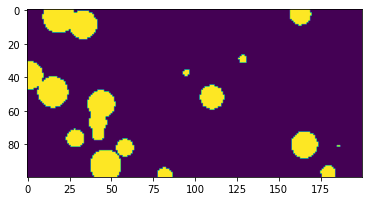

In [2]:
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt

def make_particles(shape, n_particles, max_radius, seed=99):
    """Make an array with random particles
    
    Args:
      shape: shape of array
      n_particles: number of particles in arrau
      max_radius: maximum possible radius of particles
      seed: random seed
      
    Returns: numpy array mask with particles
    """
    np.random.seed(seed)
        
    def xy_grid(shape):
        """Generate a grid of x, y values in a single array
        
        The returned array has shape (len(shape),) + shape + (1,). The last axis is
        for the operations with particles.
        """
        linspace = lambda x: np.linspace(0, x - 1, x) + 0.5
        return np.array(np.meshgrid(*map(linspace, shape), indexing="ij"))[..., None]
    
    # first axis is dimensions
    # second and third axes are shape of domain
    # last axis is the number of particles. 
    centers = (np.random.random((len(shape), n_particles)) * np.array(shape)[:, None])[:, None, None]
    radii = (np.random.random(n_particles) * max_radius)[None, None]
    return np.any(((xy_grid(shape) - centers)**2).sum(0) < radii**2, axis=-1)

arr = make_particles((100, 200), 20, 10)
plt.imshow(arr)
print('Actual number of particles:', scipy.ndimage.label(arr)[1])